# PyTorch Workflow
let's explore an example PyTorch end to end workflow.

In [1]:
what_were_covering = {1: "data (Preparing and loading)",
                     2: "build model",
                     3: "fitting the model to data (training)",
                     4: "making predictions and evaluating a model (inference)",
                     5: "saving and loading a model",
                     6: "outting it all together"}

what_were_covering

{1: 'data (Preparing and loading)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'outting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.0'

## 1. Data (preparing and loading)

Data can be almost anything... in maching learning.

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lost of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
   1. Get data into a numerical representation
   2. build a model to learn patterns in that numerica representation.
* To showcase this, let's create some *known* data using linear regression formula

In [3]:
# Create *Known* parameters
weight = 0.7
bias = 0.3

# Create 
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X),len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

#creating test set and splitting it

In [5]:
#Create a train/test split
train_split = int(0.8 * len(X))
train_split
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train), len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

# How might we better visualise our data?
# This is where the data explorer's motto comes in!
"Visualize, visualize!"

In [6]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
 """
 Plots training dat, test data and compares predictions.
 """
 plt.figure(figsize=(10,7))

 # plot training data in blue
 plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

 # plot test data in green
 plt.scatter(test_data, test_labels, c="g",s=4, label="Testing data")
    
 #Are there predictions?
 if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
 #show the legend
 plt.legend(prop={"size":14});

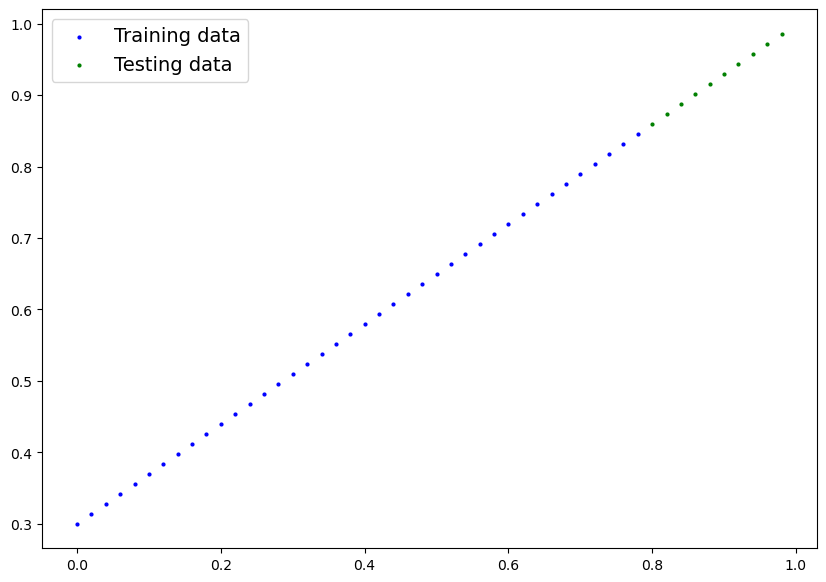

In [7]:
plot_predictions();

## 2. Build model

First PyTorch model!

What our model does:
* Start with random values(weight & bias)
* Look at the training data and adjust the random vlaues to better represnt (or get closer to) the ideal values (the weight and bias values we used to create the data)

How does it do so? 

Through two main algorithms:
1. gradient descent
2. backpropagation

In [8]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherhits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    #forward method to define the computational in the model
    def forward(self, x: torch.Tensor)-> torch.Tensor: #<- "x" is the input data
        return self.weights * x + self.bias # This is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all of the building blocks for computational graphs(a neural network can be considered a computational graph)
* torch.nn.parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

now we've created a model, let's see what's inside...

So we can checkout our model parameters or what's inside our model using `.parameters()`.

In [9]:
#create a random seed
torch.manual_seed(42)

# Create an instance of the model (This is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List name parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

to check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [11]:
# Make predictions with model

with torch.inference_mode():
    y_preds = model_0(X_test)
    
# You can also do something similar with torch.no_grad(), however, inference_mode() is preferred
# with torch.no_grad():
#     y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [12]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

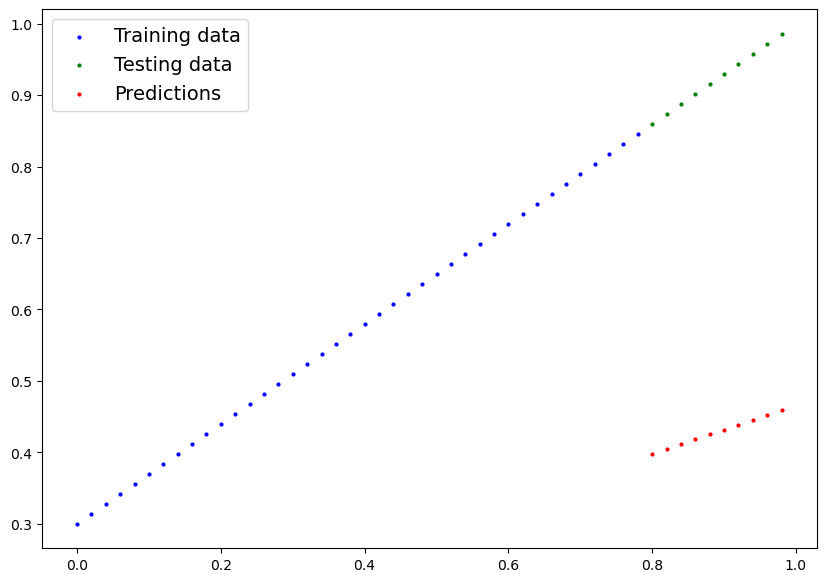

In [13]:
plot_predictions(predictions=y_preds)

### 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these maybe random) to some *known* parameters.

or in other words a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are, is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's prediction to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g weight and bias) to improve the loss function.

And specificaly for PyTorch, we need:
* A training loop
* A testing loop

In [14]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
# Setup a loss function
loss_fn = nn.L1Loss()

#setup an optimizer (Stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01) #lr = learning rate = possibly the most important hyperparameter you can set

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth lables)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**Backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameter to try and improve the loss. (**Gradient descent**)

In [17]:
torch.manual_seed(42)

# An epoch is one loop through the data...
epochs = 200

#tracking different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # Train mode in PyTorch ses all parameters that require gradients to require gradients
    
    #1. Forward pass
    y_preds = model_0(X_train)
    
    #2. Calculate the loss
    loss = loss_fn(y_preds, y_train)
    
    #3. Optimizer zero grad
    optimizer.zero_grad()
    
    #4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    
    #5. Setp the optimizer (perform gradient descent)
    optimizer.step() # By default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop
    
    ### Testing
    model_0.eval() # turns off gradient tracking
    with torch.inference_mode(): #Turns off gradient tracking and a couple of more things
        #1. Do the forward pass
        test_pred = model_0(X_test)
        
        
        #2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")
    
        #Print out model state_dict()
        print(model_0.state_dict())

Epoch: 0 | Test: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Test: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Test: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Test: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Test: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Test: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Test: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

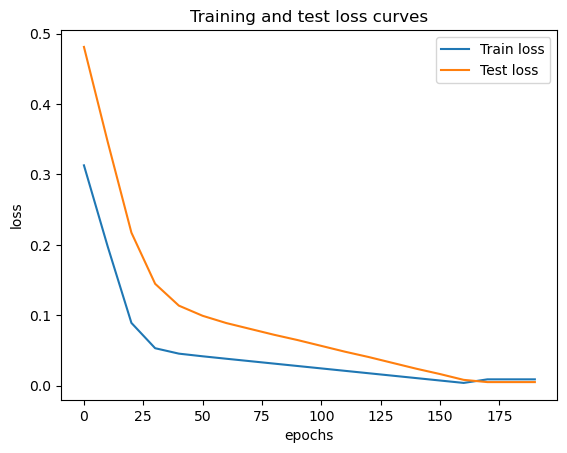

In [18]:
import numpy as np
# plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend();

In [19]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)


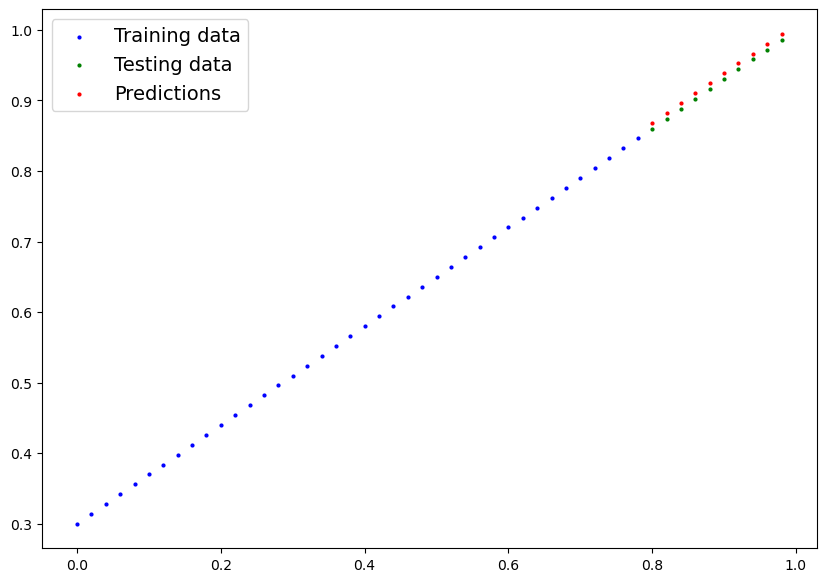

In [20]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods you should knwo about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows o load model's saved state dictionary

In [21]:
#Saving the model
PATH = "Models/state_dict_model_0.pth"
#save
torch.save(model_0.state_dict(), PATH)


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [24]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

#Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=PATH))

<All keys matched successfully>

In [25]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [26]:
#Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [28]:
#make some models preds
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

In [29]:
#Compare the loaded model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place.

In [30]:
# import PyTorch and matplotlib
import torch
import matplotlib.pyplot as plt
from torch import nn

#Check PyTorch version
torch.__version__

'2.0.0'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing)

if no GPU is available, the code will defalt to using CPU

In [32]:
#Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

In [42]:
# Create some data using the linear regression formula of y= weight * X + bias
weight = 1.0
bias = 0.5

# Create range values
start = 0
end = 1
stop = 0.02

# Create X and y (features and labels)
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800]]))

In [43]:
# Split data
train_split = int(0.8 * len(X))
x_train, y_train = X[:train_split], y[:train_split]
x_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

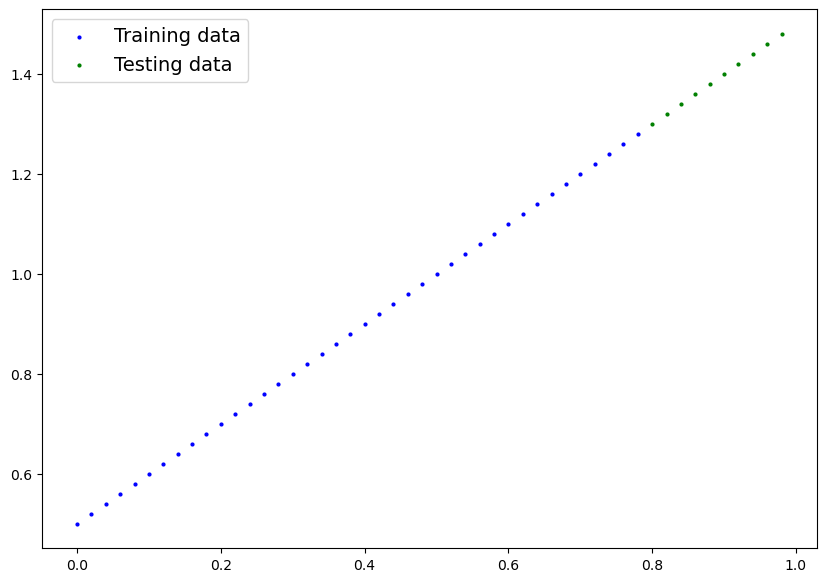

In [44]:
#plot the data
# Note: if you don't have the plot_predictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a Pytorch Linear model

In [45]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters / also called: Linear transform, probing layer, fully connected layer
        self.linear_layer = nn.Linear(in_features=1,
                                     out_features=1)
    
    def forward(self, x: torch.Tensor)-> torch.Tensor:
        return self.linear_layer(x)
    
#set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [46]:
# Check the moidel current device
next(model_1.parameters()).device

device(type='cpu')

In [48]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [50]:
# Setup loss function
loss_fn = nn.L1Loss() #Same as MAE

#setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [67]:
#Let's write a training loop
torch.manual_seed(42)

epochs = 200

#Put data on the right device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()
    
    #1. Forward pass
    y_preds = model_1(X_train)
    
    #2. Calculate the loss
    loss = loss_fn(y_preds, y_train)
    
    #3. optimizer zero grad
    optimizer.zero_grad()
    
    #4. Perform backpropagation
    loss.backward()
    
    #5. Optimizer step
    optimizer.step()
    
    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        
        test_loss = loss_fn(test_pred, y_test)
        
    #Print out wyahta's happening
    
    if epoch % 10 == 0:
        print(f"Epoch:{epoch} | Loss:{loss} | Test loss:{test_loss}")

Epoch:0 | Loss:0.008996136486530304 | Test loss:0.005130028817802668
Epoch:10 | Loss:0.008996136486530304 | Test loss:0.005130028817802668
Epoch:20 | Loss:0.008996136486530304 | Test loss:0.005130028817802668
Epoch:30 | Loss:0.008996136486530304 | Test loss:0.005130028817802668
Epoch:40 | Loss:0.008996136486530304 | Test loss:0.005130028817802668
Epoch:50 | Loss:0.008996136486530304 | Test loss:0.005130028817802668
Epoch:60 | Loss:0.008996136486530304 | Test loss:0.005130028817802668
Epoch:70 | Loss:0.008996136486530304 | Test loss:0.005130028817802668
Epoch:80 | Loss:0.008996136486530304 | Test loss:0.005130028817802668
Epoch:90 | Loss:0.008996136486530304 | Test loss:0.005130028817802668
Epoch:100 | Loss:0.008996136486530304 | Test loss:0.005130028817802668
Epoch:110 | Loss:0.008996136486530304 | Test loss:0.005130028817802668
Epoch:120 | Loss:0.008996136486530304 | Test loss:0.005130028817802668
Epoch:130 | Loss:0.008996136486530304 | Test loss:0.005130028817802668
Epoch:140 | Loss:

In [68]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.9987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.5095], device='cuda:0'))])

In [69]:
weight, bias

(1.0, 0.5)

In [70]:
# 6.4 Making and evaluating predictions
model_1.eval()

#Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[1.3085],
        [1.3284],
        [1.3484],
        [1.3684],
        [1.3884],
        [1.4083],
        [1.4283],
        [1.4483],
        [1.4682],
        [1.4882]], device='cuda:0')

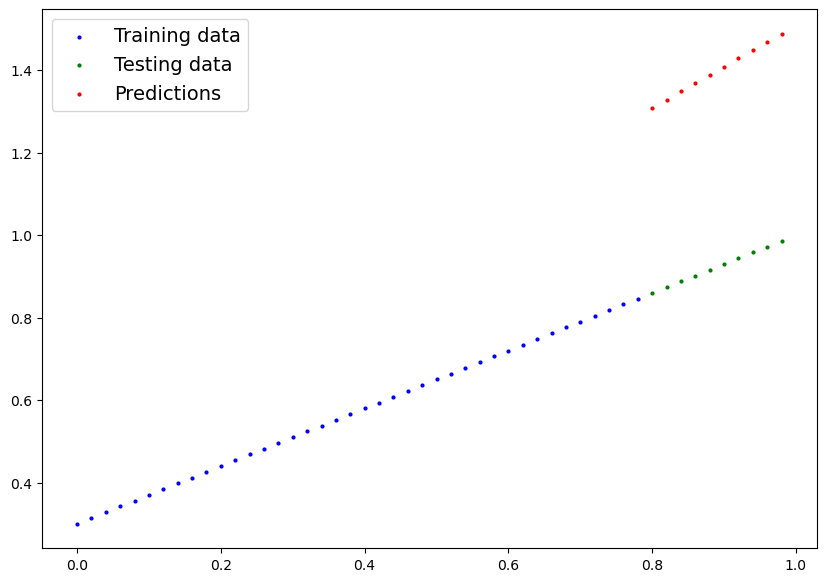

In [71]:
#Check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

In [76]:
### 6.5 Saving and loading a trained model
PATHV2 = "Models/weird_model_1_state_dict"

torch.save(model_1,
          f=PATHV2)

In [78]:
loaded_modelV2 = torch.load(f=PATHV2)
loaded_modelV2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.9987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.5095], device='cuda:0'))])